<img src='../img/header.jpg' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<hr>

# 04 - Practical exercise NO<sub>2</sub> - Solution - Arctic

## About

> In this exercise, you will put a focus on the Arctic and explore potential sources of Nitrogen Dioxide in this region. 

## Tasks

### 1. Visualise Pandora NO<sub>2</sub> measurements from the Ny Ålesund station in August 2023
  * &#128073; Download Pandora NO<sub>2</sub> measurements for the Ny Ålesund station
  * &#128073; Filter the data to August 2023 and plot it as time-series

### 2. Brainstorm &#11088;
  * What do you see in the Pandora NO<sub>2</sub> measurements from the Ny Ålesund station?
  * What could be the reason and source for the elevated values?
  * What other datasets could you use to understand potential sources?

### 3. Download and animate CAMS global forecast data for 26 August 2023
  * &#128073; Download the five-day forecast data for the variable `Organic matter aerosol optical depth 550` from the Copernicus Atmosphere Data Store
  * &#128073; Visualize and animate the Organic matter Aerosol Optical Depth forecast for 26 August 2023
  * What do you see?

### 4. Visualise the regional Emission sensitivity data from the FLEXPART model for 29 August 2023
  * &#128073; Read and visualize outputs from the FLEXPART model from 29 August 2023. You find the dataset in this folder: `./SVAR-regional-ES-NO0042G20days_level110km_2023-08-29.nc`

### 5. Interpret the results &#127775;
  * Summarise your findings from all three datasets!
  * What can you say about the source of increased NO2 measurements end of August in Ny Alesund?

## Module outline
* [1 - Visualise Pandora NO<sub>2</sub> measurements from the Ny Ålesund station in August 2023](#pandora)
* [2 - Brainstorm](#brainstorm)
* [3 - Download and animate CAMS global forecast data for 26 August 2023](#cams)
* [4 - Visualise the regional Emission sensitivity data from the FLEXPART model for 29 August 2023](#emission_sensitivity)
* [5 - Interpret the results](#results)


<hr>

#### Load required libraries

In [21]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
import requests
import shutil
import cdsapi

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.axes import Axes
from matplotlib import animation
from matplotlib import colors

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

#### Load helper functions

In [9]:
%run ../functions.ipynb

<hr>

## <a id='pandora'></a>1. Visualise Pandora NO<sub>2</sub> measurements from the Ny Ålesund station in August 2023


The Ny Ålesund station in Ny-Ålesund, Svalbard, Norway has the Pandora instrument number 152.

In a first step, you want to download PGN data for Ny-Ålesund as a `.txt` file. From the [PDN web interface](https://data.pandonia-global-network.org/) you can choose the station [Ny-Alesund](https://data.pandonia-global-network.org/NyAlesund/). 

For each instrument, the following data folders are available:
* `L1`: Level 1 measurements
* `L2`: Level 2 column measurements in .txt format
* `L2Fit`: Spectrally fitted data
* `L2_geoms`: Level 2 column measurements in `HDF` format

L2 column measurements are used for satellite validations. For this exercise, you want to choose the Level 2 column measurements in `txt`, specifically the following file: `Pandora152s1_NyAlesund_L2_rnvs3p1-8.txt`

With the Python package `requests`, you can download data from a given website. The code block below first establishes a HTTP connection with the PDN website and then copies the data into a `txt` file.

In [10]:
url = 'https://data.pandonia-global-network.org/NyAlesund/Pandora152s1/L2/Pandora152s1_NyAlesund_L2_rnvs3p1-8.txt'
response = requests.get(url, stream=True)

with open('./Pandora152s1_NyAlesund_L2_rnvs3p1-8.txt', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The file was saved successfully')

The file was saved successfully


After downloading the file from the web interface, you can define the file path where the `txt` file is stored.

In [11]:
file_path = './Pandora152s1_NyAlesund_L2_rnvs3p1-8.txt'

<br>

The next step is now to read the downloaded `txt` file as `pandas.DataFrame`. Let us start with the file of all measurements for the station Ny Ålesund. You can read the file with the function `read_csv` from the Python library [Pandas](https://pandas.pydata.org/). From the metadata above, you see that the first few lines contain metadata and column information we do not need in the pandas DataFrame. For this reason, we can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `sep`: specify the separator in the text file, e.g. a space
* `encoding`: specify the encoding of the file
* `skiprows`: specify how many rows to skip
* `header`: specify the index of the row that shall be set as header, e.g. `None` as this file has no header row

You see below that the resulting `DataFrame` has 163,772 rows and 53 columns.

In [12]:
df = pd.read_csv(file_path, encoding= 'unicode_escape', skiprows=77, sep=' ', header=None)
df

0            1      2      3       4       5       6   \
0       20200313T092202.3Z  7377.390304  20.54  83.08  149.89  105.26  277.94   
1       20200313T092301.3Z  7377.390987  20.61  83.05  150.13  105.31  278.18   
2       20200313T092401.0Z  7377.391678  19.93  83.03  150.38  105.36  278.41   
3       20200313T092522.0Z  7377.392615  19.95  82.99  150.72  105.43  278.73   
4       20200313T092620.0Z  7377.393287  19.99  82.97  150.96  105.47  278.96   
...                    ...          ...    ...    ...     ...     ...     ...   
164115  20230921T135314.2Z  8664.578637   5.90  81.13  222.57  107.48  151.61   
164116  20230921T135320.3Z  8664.578707   5.91  81.14  222.60  107.48  151.63   
164117  20230921T135326.3Z  8664.578776   5.94  81.14  222.62  107.47  151.66   
164118  20230921T135332.2Z  8664.578845   5.89  81.14  222.65  107.47  151.68   
164119  20230921T135338.2Z  8664.578915   5.90  81.15  222.67  107.47  151.70   

              7         8         9   ...      44   45    46   47    48  \
0       0.001787  0.001535  0.001457  ...  230.88 -2.0  6.43 -2.0  6.43   
1       0.001773  0.001457  0.001216  ...  231.78 -2.0  6.67 -2.0  6.67   
2       0.002208  0.001847  0.001552  ...  230.53 -2.0  6.36 -2.0  6.36   
3       0.001140  0.000936  0.000731  ...  233.41 -2.0  7.32 -2.0  7.32   
4       0.001271  0.001071  0.000951  ...  232.97 -2.0  7.11 -2.0  7.11   
...          ...       ...       ...  ...     ...  ...   ...  ...   ...   
164115  0.000692  0.000551  0.000190  ...  227.41 -2.0  6.38 -2.0  6.38   
164116  0.000716  0.000572  0.000193  ...  227.47 -2.0  6.37 -2.0  6.37   
164117  0.000718  0.000576  0.000194  ...  226.94 -2.0  6.49 -2.0  6.49   
164118  0.000733  0.000587  0.000195  ...  227.08 -2.0  6.46 -2.0  6.46   
164119  0.000722  0.000579  0.000198  ...  227.46 -2.0  6.37 -2.0  6.37   

           49     50   51        52        53  
0       6.671  0.006  0.0  0.000014  0.000007  
1       6.705  0.006  0.0  0.000014  0.000007  
2       6.621  0.007  0.0  0.000014  0.000007  
3       6.767  0.005  0.0  0.000014  0.000007  
4       6.728  0.005  0.0  0.000014  0.000007  
...       ...    ...  ...       ...       ...  
164115  5.567  0.004  0.0  0.000037  0.000007  
164116  5.573  0.004  0.0  0.000037  0.000007  
164117  5.563  0.005  0.0  0.000037  0.000007  
164118  5.566  0.004  0.0  0.000037  0.000007  
164119  5.577  0.004  0.0  0.000037  0.000007  

[164120 rows x 54 columns]

Now, set the first column with the time information as index with the function `set_index()`. Afterwards, you can convert the measurements time format to a `DateTime` object, which allows for a more systematic handling of the time information.

In [13]:
df = df.set_index(0)
df.index = pd.to_datetime(df.index, format = '%Y%m%dT%H%M%S.%fZ')
df

1      2      3       4       5       6   \
0                                                                            
2020-03-13 09:22:02.300  7377.390304  20.54  83.08  149.89  105.26  277.94   
2020-03-13 09:23:01.300  7377.390987  20.61  83.05  150.13  105.31  278.18   
2020-03-13 09:24:01.000  7377.391678  19.93  83.03  150.38  105.36  278.41   
2020-03-13 09:25:22.000  7377.392615  19.95  82.99  150.72  105.43  278.73   
2020-03-13 09:26:20.000  7377.393287  19.99  82.97  150.96  105.47  278.96   
...                              ...    ...    ...     ...     ...     ...   
2023-09-21 13:53:14.200  8664.578637   5.90  81.13  222.57  107.48  151.61   
2023-09-21 13:53:20.300  8664.578707   5.91  81.14  222.60  107.48  151.63   
2023-09-21 13:53:26.300  8664.578776   5.94  81.14  222.62  107.47  151.66   
2023-09-21 13:53:32.200  8664.578845   5.89  81.14  222.65  107.47  151.68   
2023-09-21 13:53:38.200  8664.578915   5.90  81.15  222.67  107.47  151.70   

                               7         8         9         10  ...      44  \
0                                                                ...           
2020-03-13 09:22:02.300  0.001787  0.001535  0.001457  0.001266  ...  230.88   
2020-03-13 09:23:01.300  0.001773  0.001457  0.001216  0.001054  ...  231.78   
2020-03-13 09:24:01.000  0.002208  0.001847  0.001552  0.001339  ...  230.53   
2020-03-13 09:25:22.000  0.001140  0.000936  0.000731  0.000636  ...  233.41   
2020-03-13 09:26:20.000  0.001271  0.001071  0.000951  0.000825  ...  232.97   
...                           ...       ...       ...       ...  ...     ...   
2023-09-21 13:53:14.200  0.000692  0.000551  0.000190  0.000167  ...  227.41   
2023-09-21 13:53:20.300  0.000716  0.000572  0.000193  0.000169  ...  227.47   
2023-09-21 13:53:26.300  0.000718  0.000576  0.000194  0.000170  ...  226.94   
2023-09-21 13:53:32.200  0.000733  0.000587  0.000195  0.000171  ...  227.08   
2023-09-21 13:53:38.200  0.000722  0.000579  0.000198  0.000173  ...  227.46   

                          45    46   47    48     49     50   51        52  \
0                                                                            
2020-03-13 09:22:02.300 -2.0  6.43 -2.0  6.43  6.671  0.006  0.0  0.000014   
2020-03-13 09:23:01.300 -2.0  6.67 -2.0  6.67  6.705  0.006  0.0  0.000014   
2020-03-13 09:24:01.000 -2.0  6.36 -2.0  6.36  6.621  0.007  0.0  0.000014   
2020-03-13 09:25:22.000 -2.0  7.32 -2.0  7.32  6.767  0.005  0.0  0.000014   
2020-03-13 09:26:20.000 -2.0  7.11 -2.0  7.11  6.728  0.005  0.0  0.000014   
...                      ...   ...  ...   ...    ...    ...  ...       ...   
2023-09-21 13:53:14.200 -2.0  6.38 -2.0  6.38  5.567  0.004  0.0  0.000037   
2023-09-21 13:53:20.300 -2.0  6.37 -2.0  6.37  5.573  0.004  0.0  0.000037   
2023-09-21 13:53:26.300 -2.0  6.49 -2.0  6.49  5.563  0.005  0.0  0.000037   
2023-09-21 13:53:32.200 -2.0  6.46 -2.0  6.46  5.566  0.004  0.0  0.000037   
2023-09-21 13:53:38.200 -2.0  6.37 -2.0  6.37  5.577  0.004  0.0  0.000037   

                               53  
0                                  
2020-03-13 09:22:02.300  0.000007  
2020-03-13 09:23:01.300  0.000007  
2020-03-13 09:24:01.000  0.000007  
2020-03-13 09:25:22.000  0.000007  
2020-03-13 09:26:20.000  0.000007  
...                           ...  
2023-09-21 13:53:14.200  0.000007  
2023-09-21 13:53:20.300  0.000007  
2023-09-21 13:53:26.300  0.000007  
2023-09-21 13:53:32.200  0.000007  
2023-09-21 13:53:38.200  0.000007  

[164120 rows x 53 columns]

Now, let us filter out measurements for which the data retrieval was not successsful. Row entries of column 38 with `-9e99` shall be filtered out. For this station, all measurements seem to have been successfully retrieved, as the number of rows remains the same.

In [14]:
mask = df[38] == -9e99

# Drop the rows with the mask.
no2_df = df.drop(df[mask].index)
no2_df

1      2      3       4       5       6   \
0                                                                            
2020-03-13 09:22:02.300  7377.390304  20.54  83.08  149.89  105.26  277.94   
2020-03-13 09:23:01.300  7377.390987  20.61  83.05  150.13  105.31  278.18   
2020-03-13 09:24:01.000  7377.391678  19.93  83.03  150.38  105.36  278.41   
2020-03-13 09:25:22.000  7377.392615  19.95  82.99  150.72  105.43  278.73   
2020-03-13 09:26:20.000  7377.393287  19.99  82.97  150.96  105.47  278.96   
...                              ...    ...    ...     ...     ...     ...   
2023-09-21 13:53:14.200  8664.578637   5.90  81.13  222.57  107.48  151.61   
2023-09-21 13:53:20.300  8664.578707   5.91  81.14  222.60  107.48  151.63   
2023-09-21 13:53:26.300  8664.578776   5.94  81.14  222.62  107.47  151.66   
2023-09-21 13:53:32.200  8664.578845   5.89  81.14  222.65  107.47  151.68   
2023-09-21 13:53:38.200  8664.578915   5.90  81.15  222.67  107.47  151.70   

                               7         8         9         10  ...      44  \
0                                                                ...           
2020-03-13 09:22:02.300  0.001787  0.001535  0.001457  0.001266  ...  230.88   
2020-03-13 09:23:01.300  0.001773  0.001457  0.001216  0.001054  ...  231.78   
2020-03-13 09:24:01.000  0.002208  0.001847  0.001552  0.001339  ...  230.53   
2020-03-13 09:25:22.000  0.001140  0.000936  0.000731  0.000636  ...  233.41   
2020-03-13 09:26:20.000  0.001271  0.001071  0.000951  0.000825  ...  232.97   
...                           ...       ...       ...       ...  ...     ...   
2023-09-21 13:53:14.200  0.000692  0.000551  0.000190  0.000167  ...  227.41   
2023-09-21 13:53:20.300  0.000716  0.000572  0.000193  0.000169  ...  227.47   
2023-09-21 13:53:26.300  0.000718  0.000576  0.000194  0.000170  ...  226.94   
2023-09-21 13:53:32.200  0.000733  0.000587  0.000195  0.000171  ...  227.08   
2023-09-21 13:53:38.200  0.000722  0.000579  0.000198  0.000173  ...  227.46   

                          45    46   47    48     49     50   51        52  \
0                                                                            
2020-03-13 09:22:02.300 -2.0  6.43 -2.0  6.43  6.671  0.006  0.0  0.000014   
2020-03-13 09:23:01.300 -2.0  6.67 -2.0  6.67  6.705  0.006  0.0  0.000014   
2020-03-13 09:24:01.000 -2.0  6.36 -2.0  6.36  6.621  0.007  0.0  0.000014   
2020-03-13 09:25:22.000 -2.0  7.32 -2.0  7.32  6.767  0.005  0.0  0.000014   
2020-03-13 09:26:20.000 -2.0  7.11 -2.0  7.11  6.728  0.005  0.0  0.000014   
...                      ...   ...  ...   ...    ...    ...  ...       ...   
2023-09-21 13:53:14.200 -2.0  6.38 -2.0  6.38  5.567  0.004  0.0  0.000037   
2023-09-21 13:53:20.300 -2.0  6.37 -2.0  6.37  5.573  0.004  0.0  0.000037   
2023-09-21 13:53:26.300 -2.0  6.49 -2.0  6.49  5.563  0.005  0.0  0.000037   
2023-09-21 13:53:32.200 -2.0  6.46 -2.0  6.46  5.566  0.004  0.0  0.000037   
2023-09-21 13:53:38.200 -2.0  6.37 -2.0  6.37  5.577  0.004  0.0  0.000037   

                               53  
0                                  
2020-03-13 09:22:02.300  0.000007  
2020-03-13 09:23:01.300  0.000007  
2020-03-13 09:24:01.000  0.000007  
2020-03-13 09:25:22.000  0.000007  
2020-03-13 09:26:20.000  0.000007  
...                           ...  
2023-09-21 13:53:14.200  0.000007  
2023-09-21 13:53:20.300  0.000007  
2023-09-21 13:53:26.300  0.000007  
2023-09-21 13:53:32.200  0.000007  
2023-09-21 13:53:38.200  0.000007  

[164120 rows x 53 columns]

Now, let us filter out the low-quality measurements and let us only keep assured and non-assured high- and medium-quality measurements. The resulting DataFrame has a reduced number of rows of 125,799.  

In [15]:
# Define the filter
qc_filter =  no2_df[35].isin([0,1,10,11])

# Apply the filter
no2_df_qc =  no2_df[qc_filter]
no2_df_qc

1      2      3       4       5       6   \
0                                                                            
2020-04-08 13:20:47.600  7403.556107  19.26  73.13  212.98  106.67   24.84   
2020-04-08 13:21:44.600  7403.556766  19.25  73.15  213.22  106.65   25.08   
2020-04-08 13:22:41.600  7403.557426  19.28  73.18  213.47  106.64   25.32   
2020-04-08 13:23:39.600  7403.558098  19.28  73.20  213.72  106.62   25.56   
2020-04-08 13:29:58.600  7403.562484  19.26  73.37  215.34  106.52   27.12   
...                              ...    ...    ...     ...     ...     ...   
2023-09-21 13:53:14.200  8664.578637   5.90  81.13  222.57  107.48  151.61   
2023-09-21 13:53:20.300  8664.578707   5.91  81.14  222.60  107.48  151.63   
2023-09-21 13:53:26.300  8664.578776   5.94  81.14  222.62  107.47  151.66   
2023-09-21 13:53:32.200  8664.578845   5.89  81.14  222.65  107.47  151.68   
2023-09-21 13:53:38.200  8664.578915   5.90  81.15  222.67  107.47  151.70   

                               7         8         9         10  ...      44  \
0                                                                ...           
2020-04-08 13:20:47.600  0.000266  0.000244  0.000060  0.000057  ...  226.00   
2020-04-08 13:21:44.600  0.000268  0.000246  0.000060  0.000057  ...  226.00   
2020-04-08 13:22:41.600  0.000269  0.000245  0.000060  0.000057  ...  226.00   
2020-04-08 13:23:39.600  0.000265  0.000240  0.000060  0.000057  ...  226.00   
2020-04-08 13:29:58.600  0.000278  0.000255  0.000060  0.000058  ...  226.00   
...                           ...       ...       ...       ...  ...     ...   
2023-09-21 13:53:14.200  0.000692  0.000551  0.000190  0.000167  ...  227.41   
2023-09-21 13:53:20.300  0.000716  0.000572  0.000193  0.000169  ...  227.47   
2023-09-21 13:53:26.300  0.000718  0.000576  0.000194  0.000170  ...  226.94   
2023-09-21 13:53:32.200  0.000733  0.000587  0.000195  0.000171  ...  227.08   
2023-09-21 13:53:38.200  0.000722  0.000579  0.000198  0.000173  ...  227.46   

                          45    46   47    48     49     50   51        52  \
0                                                                            
2020-04-08 13:20:47.600 -2.0  3.16 -2.0  3.16  3.297  0.002  0.0  0.000054   
2020-04-08 13:21:44.600 -2.0  3.16 -2.0  3.16  3.301  0.002  0.0  0.000054   
2020-04-08 13:22:41.600 -2.0  3.16 -2.0  3.16  3.306  0.002  0.0  0.000054   
2020-04-08 13:23:39.600 -2.0  3.16 -2.0  3.16  3.309  0.002  0.0  0.000054   
2020-04-08 13:29:58.600 -2.0  3.16 -2.0  3.16  3.339  0.002  0.0  0.000054   
...                      ...   ...  ...   ...    ...    ...  ...       ...   
2023-09-21 13:53:14.200 -2.0  6.38 -2.0  6.38  5.567  0.004  0.0  0.000037   
2023-09-21 13:53:20.300 -2.0  6.37 -2.0  6.37  5.573  0.004  0.0  0.000037   
2023-09-21 13:53:26.300 -2.0  6.49 -2.0  6.49  5.563  0.005  0.0  0.000037   
2023-09-21 13:53:32.200 -2.0  6.46 -2.0  6.46  5.566  0.004  0.0  0.000037   
2023-09-21 13:53:38.200 -2.0  6.37 -2.0  6.37  5.577  0.004  0.0  0.000037   

                               53  
0                                  
2020-04-08 13:20:47.600  0.000007  
2020-04-08 13:21:44.600  0.000007  
2020-04-08 13:22:41.600  0.000007  
2020-04-08 13:23:39.600  0.000007  
2020-04-08 13:29:58.600  0.000007  
...                           ...  
2023-09-21 13:53:14.200  0.000007  
2023-09-21 13:53:20.300  0.000007  
2023-09-21 13:53:26.300  0.000007  
2023-09-21 13:53:32.200  0.000007  
2023-09-21 13:53:38.200  0.000007  

[126088 rows x 53 columns]

Now, let us select measurements only during August 2023.

In [16]:
# Create a boolean mask to identify the rows to be filtered by date
mask = (no2_df_qc.index >= datetime(2023, 8, 1)) & (no2_df_qc.index <= datetime(2023, 8, 31))

# Filter the dataframe with the mask.
no2_df_qc = no2_df_qc.loc[mask]
no2_df_qc

1      2      3       4       5       6   \
0                                                                            
2023-08-01 19:47:38.700  8613.824753   5.95  78.97  309.50  106.81  128.19   
2023-08-01 19:47:44.700  8613.824823   5.94  78.98  309.52  106.81  128.21   
2023-08-01 19:47:50.800  8613.824894   6.30  78.98  309.54  106.80  128.23   
2023-08-01 19:47:57.200  8613.824967   6.16  78.98  309.57  106.80  128.26   
2023-08-01 21:23:18.200  8613.891183  15.10  81.87  332.38  103.65  149.83   
...                              ...    ...    ...     ...     ...     ...   
2023-08-30 08:26:29.400  8642.351729   6.60  72.79  136.61  116.89  324.08   
2023-08-30 08:26:36.100  8642.351806   6.54  72.78  136.63  116.89  324.11   
2023-08-30 08:26:42.800  8642.351884   6.58  72.78  136.66  116.89  324.14   
2023-08-30 08:26:49.400  8642.351961   6.58  72.78  136.69  116.89  324.17   
2023-08-30 08:44:25.900  8642.364189  18.67  72.23  141.21  117.27  328.67   

                               7         8         9         10  ...      44  \
0                                                                ...           
2023-08-01 19:47:38.700  0.000599  0.000494  0.000189  0.000171  ...  239.09   
2023-08-01 19:47:44.700  0.000471  0.000383  0.000181  0.000163  ...  239.32   
2023-08-01 19:47:50.800  0.000477  0.000390  0.000175  0.000159  ...  239.48   
2023-08-01 19:47:57.200  0.000505  0.000413  0.000173  0.000157  ...  239.10   
2023-08-01 21:23:18.200  0.001082  0.000875  0.000203  0.000179  ...  248.94   
...                           ...       ...       ...       ...  ...     ...   
2023-08-30 08:26:29.400  0.000373  0.000333  0.000195  0.000183  ...  236.98   
2023-08-30 08:26:36.100  0.000374  0.000332  0.000188  0.000177  ...  237.25   
2023-08-30 08:26:42.800  0.000346  0.000306  0.000182  0.000171  ...  236.98   
2023-08-30 08:26:49.400  0.000360  0.000321  0.000175  0.000165  ...  236.48   
2023-08-30 08:44:25.900  0.000482  0.000421  0.000204  0.000190  ...  237.12   

                          45    46   47    48     49     50   51        52  \
0                                                                            
2023-08-01 19:47:38.700 -2.0  4.41 -2.0  4.41  4.768  0.003  0.0  0.000073   
2023-08-01 19:47:44.700 -2.0  4.44 -2.0  4.44  4.774  0.002  0.0  0.000073   
2023-08-01 19:47:50.800 -2.0  4.46 -2.0  4.46  4.776  0.002  0.0  0.000073   
2023-08-01 19:47:57.200 -2.0  4.42 -2.0  4.42  4.772  0.003  0.0  0.000073   
2023-08-01 21:23:18.200 -2.0  7.70 -2.0  7.70  6.268  0.002  0.0  0.000074   
...                      ...   ...  ...   ...    ...    ...  ...       ...   
2023-08-30 08:26:29.400 -2.0  5.27 -2.0  5.27  3.258  0.002  0.0  0.000055   
2023-08-30 08:26:36.100 -2.0  5.32 -2.0  5.32  3.257  0.002  0.0  0.000055   
2023-08-30 08:26:42.800 -2.0  5.27 -2.0  5.27  3.257  0.002  0.0  0.000055   
2023-08-30 08:26:49.400 -2.0  5.18 -2.0  5.18  3.255  0.002  0.0  0.000055   
2023-08-30 08:44:25.900 -2.0  5.29 -2.0  5.29  3.166  0.002  0.0  0.000055   

                               53  
0                                  
2023-08-01 19:47:38.700  0.000007  
2023-08-01 19:47:44.700  0.000007  
2023-08-01 19:47:50.800  0.000007  
2023-08-01 19:47:57.200  0.000007  
2023-08-01 21:23:18.200  0.000007  
...                           ...  
2023-08-30 08:26:29.400  0.000007  
2023-08-30 08:26:36.100  0.000007  
2023-08-30 08:26:42.800  0.000007  
2023-08-30 08:26:49.400  0.000007  
2023-08-30 08:44:25.900  0.000007  

[4680 rows x 53 columns]

The last step is to visualise the Nitrogen Dioxide measurements (column 38) together with the error bar (column 39) for the Ny Ålesund station during August 2023. 

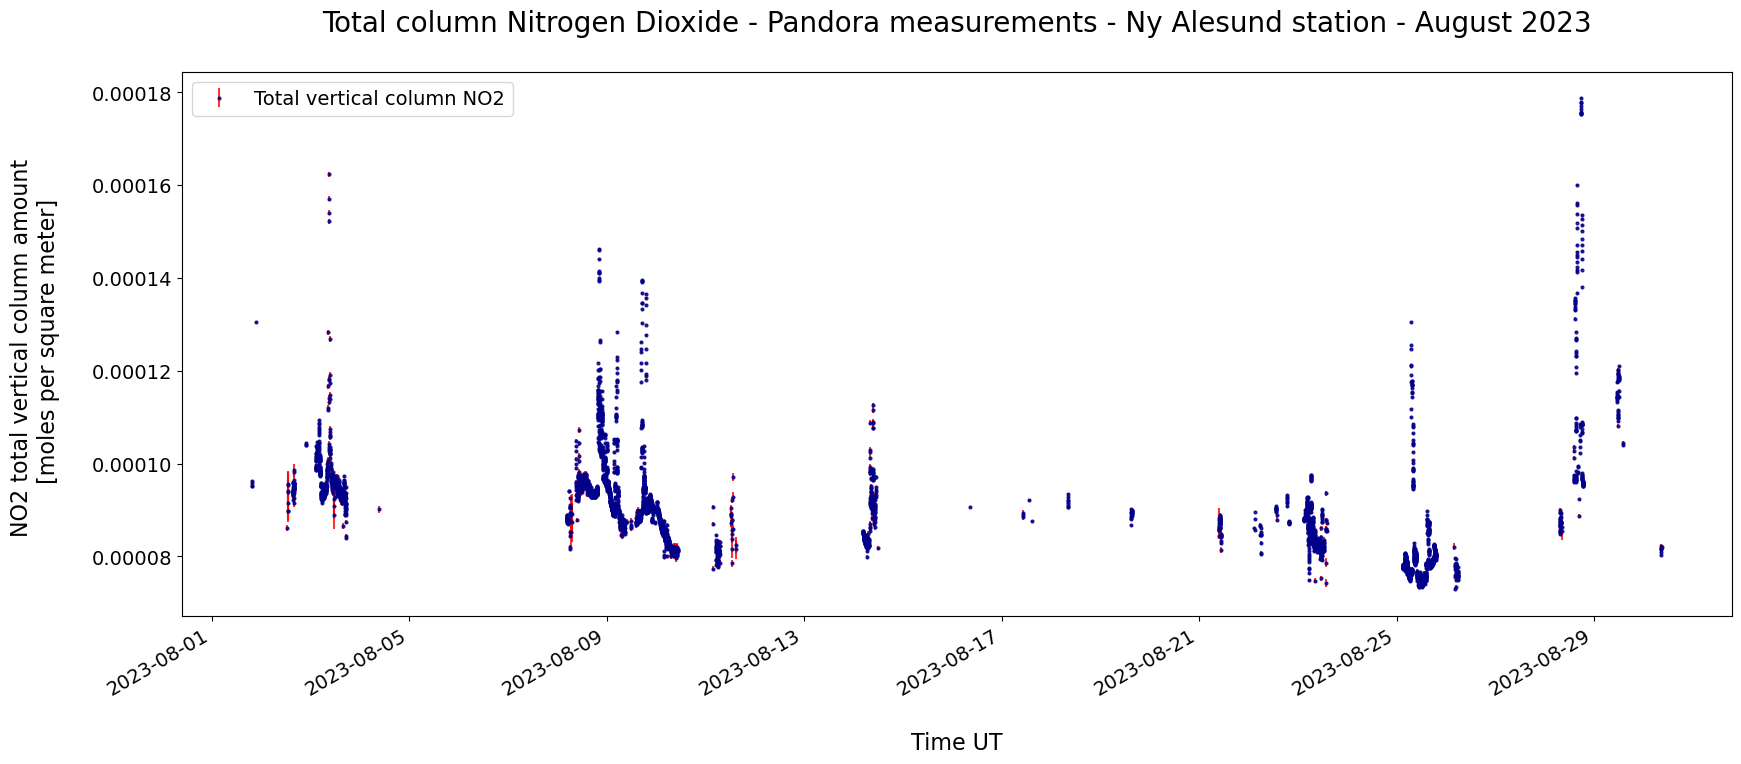

In [17]:
# Select NO2 measurements
no2 = no2_df_qc.loc[:,38]

# Select the independent uncertainty of the measurement
no2_err = no2_df_qc.loc[:,39]

# Visualise a time-series plot
fig, ax = plt.subplots(figsize=(20,8))
ax.errorbar(no2.index, no2, yerr=no2_err, ecolor='r', label='Total vertical column NO2', alpha=0.8, color='darkblue', marker='.', linestyle='none', markersize=4 )

plt.xlabel('\nTime UT', fontsize=16)
plt.ylabel('NO2 total vertical column amount \n [moles per square meter]\n',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc=2)
plt.title('Total column Nitrogen Dioxide - Pandora measurements - Ny Alesund station - August 2023\n', fontsize=20)

fig.autofmt_xdate()
plt.show()

Now, go to the [next task](#brainstorm) to reflect on the results of this task.

<br>

## <a id='brainstorm'></a> 2. Brainstorm &#11088;
  * What do you see in the Pandora NO<sub>2</sub> measurements from the Ny Ålesund station?
  > We see elevated values of Nitrogen Dioxide on 28th and 29th August 2023.
  
  * What could be the reason and source for the elevated values?
  > The total column Nitrogen Dioxide (NO2) in the Arctic is, as elsewhere, driven by various factors, such as sources, chemistry, transport, and local conditions. Here are some keywords and explanations for each factor: 
>
> * **Sources**: In the Arctic, the main sources of NO2 are anthropogenic emissions from Europe and Asia, biomass burning, and natural emissions from tundra. The relative contribution of each source varies depending on the season. 
>
> * **Chemistry**: NO2 undergoes various chemical reactions in the atmosphere, such as photolysis, oxidation, and heterogeneous processes. Photolysis of NO2 by solar radiation produces NO and O3, which can further react to form NO2 again. Heterogeneous processes involve the uptake of NO2 by aerosols or snow, which can alter the NOx (NO + NO2) budget and affect the ozone depletion events in the polar regions. [Source](https://insu.hal.science/insu-03527645/document)
>
> * **Transport**: NO2 can be transported from lower latitudes to higher latitudes by large-scale atmospheric circulation patterns, such as the polar jet stream, the polar vortex, and the Brewer-Dobson circulation. These patterns can influence the interannual variability and trends of NO2 in the Arctic. For example, a stronger polar vortex can isolate the Arctic air mass from the mid-latitude air mass, resulting in lower NO2 levels in the Arctic. Conversely, a weaker polar vortex can enhance the mixing of air masses and increase the NO2 levels in the Arctic. 
>
> * **Local conditions**: The local conditions in the Arctic, such as temperature, humidity, cloud cover, snow cover, and surface albedo, can also affect the NO2 levels. For instance, lower temperatures can slow down the chemical reactions and increase the lifetime of NO2. Higher humidity can enhance the formation of HNO3 and reduce the NO2 levels. Cloud cover can reflect or scatter the solar radiation and affect the photolysis rate of NO2. Snow cover can provide a surface for heterogeneous reactions and change the partitioning of NOx species. Surface albedo can influence the amount of radiation reaching the ground and alter the photochemical processes. 
>
> The specific elevated NO2 measurements end of August could be related to the Canadian wildfires during this summer. 

  * What other datasets could you use to understand potential sources?
>
> You can use the **Copernicus global atmospheric composition forecasts** to see whether smoke from the Canadian fires was transported to the Arctic. Additionally, NILU produces **emission sensitivity** data for different trace gases, with the help of the FLEXPART (FLEXible PARTicle) Lagrangian transport model. This data helps to better analyse the transport and dispersion of air pollutants, such as gases or aerosols, in the atmosphere. 

## <a id='cams'></a> 3. Download and animate CAMS global forecast data for 26 August 2023

First step is to request the data from the Copernicus Atmosphere Data Store (ADS). Via the [ADS web interface](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=form), you can select the data and at the end of the web interface, you can open the ADS request via `Show API request`. Copy the request displayed there in the cell below. Once you execute the cell, the download of the data starts automatically.

The variable to be requested is `Organic matter aerosol optical depth at 550nm`.

In [ ]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='###########################'
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'date': '2023-08-26/2023-08-26',
        'type': 'forecast',
        'format': 'netcdf_zip',
        'variable': 'organic_matter_aerosol_optical_depth_550nm',
        'time': '00:00',
        'leadtime_hour': [
            '0', '102', '105',
            '108', '111', '114',
            '117', '12', '120',
            '15', '18', '21',
            '24', '27', '3',
            '30', '33', '36',
            '39', '42', '45',
            '48', '51', '54',
            '57', '6', '60',
            '63', '66', '69',
            '72', '75', '78',
            '81', '84', '87',
            '9', '90', '93',
            '96', '99',
        ],
    },
    './20230826_omaod550.netcdf_zip')

<br>

The next step is to unzip the downloaded zip archive to extract the actual data. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. After the data extraction, you will see a new file called `data.nc` appearing in the same folder as this notebook.

In [5]:
import zipfile
with zipfile.ZipFile('./20230826_omaod550.netcdf_zip', 'r') as zip_ref:
    zip_ref.extractall('./')

Now you can open the extracted NetCDF file with the xarray function `open_dataset()`. The result is a three-dimension xarray.Dataset with one variable.

In [13]:
file = xr.open_dataset('./data.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 900, latitude: 451, time: 41)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2023-08-26 ... 2023-08-31
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-20 09:14:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In a next step, you want to extract the variable as xarray.DataArray from the above xarray.Dataset.

In [14]:
omaod550 = file['omaod550']
omaod550

<xarray.DataArray 'omaod550' (time: 41, latitude: 451, longitude: 900)>
[16641900 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2023-08-26 ... 2023-08-31
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

Now you can visualise one time step of the organic matter aerosol optical depth at 550 nm. You can use the function `visualize_pcolormesh` to do so.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Organic Matter Aerosol Optical Depth at 550nm 2023-08-28T12:00:00'}>)

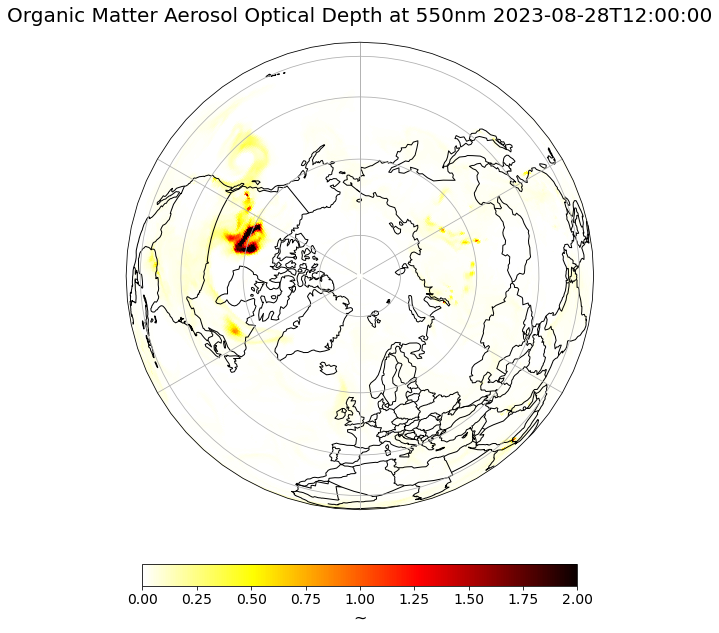

In [15]:
time_index = 20
visualize_pcolormesh(data_array=omaod550[time_index,:,:],
                     longitude=omaod550.longitude,
                     latitude=omaod550.latitude,
                     projection=ccrs.Orthographic(central_latitude=90),
                     color_scale='hot_r',
                     unit=omaod550.units,
                     long_name=omaod550.long_name + ' ' + str(omaod550[time_index,:,:].time.data)[0:19],
                     vmin=0, 
                     vmax=2)

As a last step, you can animate the data and create an animation of the organic matter aerosol optical depth forecast over a period of five days, starting on 26 August 2023.

In [18]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=omaod550[0,:,:],
                               longitude=omaod550.longitude, 
                               latitude=omaod550.latitude,
                               projection=ccrs.Orthographic(0,90), 
                               color_scale='hot_r', 
                               unit=omaod550.units,
                               long_name=omaod550.long_name + ' '+ str(omaod550.time[0].data)[0:19],
                               vmin=0,
                               vmax=2)

frames = 40

def draw(i):
    img = plt.pcolormesh(omaod550.longitude, 
                         omaod550.latitude, 
                         omaod550[i,:,:], 
                         cmap='hot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=2,
                         shading='auto')
    
    ax.set_title(omaod550.long_name + ' '+ str(omaod550.time[i].data)[0:19], fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

#### Play the animation video as HTML5 video

In [19]:
HTML(ani.to_html5_video())

<br>

## <a id='emission_sensitivity'></a> 4. Visualise the regional Emission sensitivity data from the FLEXPART model for 29 August 2023

The first step is to read the NetCDF dataset with the xarray function `open_dataset()`. The result is a two-dimensional dataset with EmissionSensitivity as variable. 

In [18]:
file_es = xr.open_dataset('./SVAR-regional-ES-NO0042G20days_level110km_2023-08-29.nc')
file_es

<xarray.Dataset>
Dimensions:              (latitude: 180, longitude: 360)
Coordinates:
  * longitude            (longitude) float64 -178.5 -177.5 ... 179.5 180.5
  * latitude             (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    EmissionSensitivity  (latitude, longitude) float64 ...

In a next step, you want to extract the `EmissionSensitivity` as xarray.DataArray.

In [19]:
es = file_es['EmissionSensitivity']
es

<xarray.DataArray 'EmissionSensitivity' (latitude: 180, longitude: 360)>
[64800 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 -178.5 -177.5 -176.5 ... 178.5 179.5 180.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5

In a final step, you can visualise the Emission Sensitivity data with matplotlib's `pcolormesh()` function.

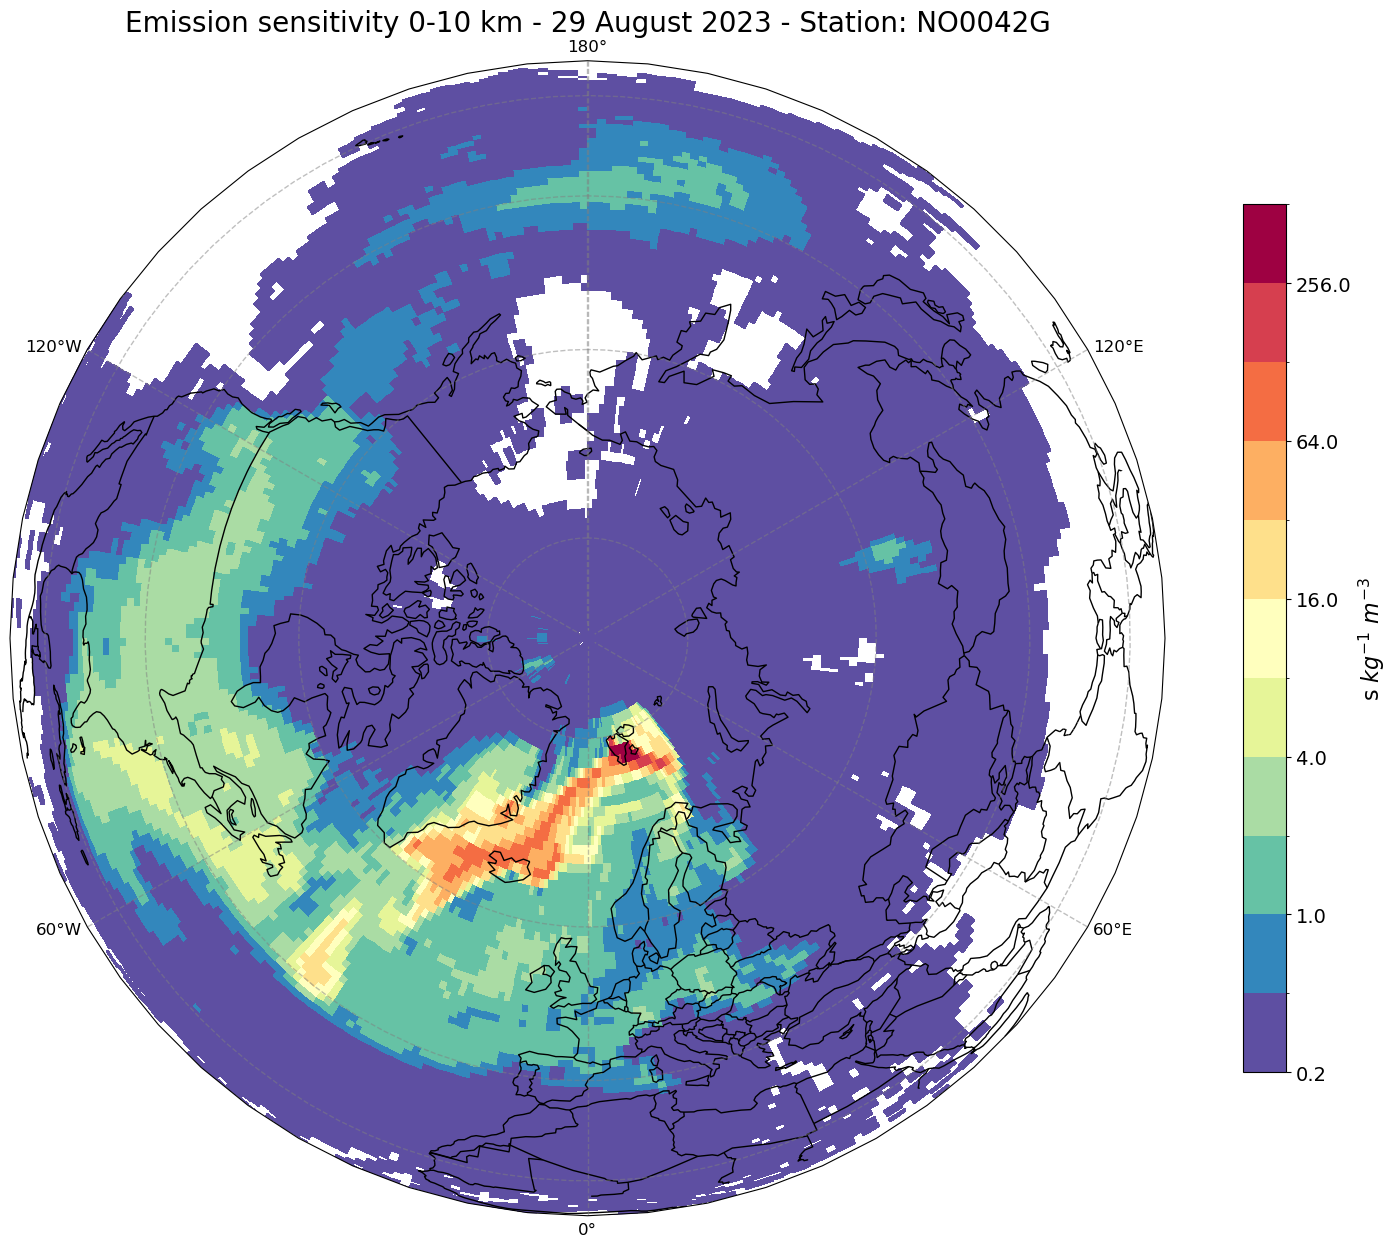

In [23]:
bounds = [0.25,0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256,512]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90, central_longitude=0))

img = plt.pcolormesh(es.longitude,
                     es.latitude,
                     es.data,
                     cmap='Spectral_r',
                     norm=norm,
                    transform=ccrs.PlateCarree(),
                    shading='auto')

ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}

ax.set_title('Emission sensitivity 0-10 km - 29 August 2023 - Station: NO0042G', fontsize=20)

cbar = plt.colorbar(img,fraction=0.028, pad=0.05)
cbar.set_label('s $kg^{-1}$ $m^{-3}$', fontsize=16)
cbar.ax.tick_params(labelsize=14)

## <a id='results'></a> 5. Interpret the results &#127775;

* Summarise your findings from all three datasets!
> 
* What can you say about the source of increased NO<sub>2</sub> measurements end of August in Ny Ålesund?
> Active fires are located in the upper left corner (northern Canada) of the FLEXPART Emission Sensitivity plot. The 10km height (fire release at 100m) signal shows that the fires are detected at higher altitudes, and better seen by total column instrument such as the Pandora, and not on ground level (even though it is visible there as well). 


<br>

<hr>

This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:left;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>

<img src='../img/footer.jpg' alt='Joint Training School Footer' align='left' width='100%'>